# SBPqO - 2021

## Objetivo

O objetivo deste estudo foi construir um modelo estatístico supervisionado para facilitar a identificação de metaloproteinases (MMPs) depositadas em bases de dados públicos.

## Metodologia

Sequencias de aminoácidos de Mamíferos e bactérias depositadas como possíveis MMPs foram recuperadas da base de dados pública RefSeq. 


Total de Sequências baixadas:
* Mamíferos: 1.134
* Bactérias: 4.342

O RPS-Blast foi utilizado para a identificar os domínios conservados característicos da família das MMPs. Um script foi desenvolvido em Phyton para filtrar as sequencias que apresentaram todos os domínios característicos. 

Total de sequências após o filtro:
* Mamíferos: 910
* Bactérias: 250

As sequências foram alinhadas com o programa Mafft e cada posição (aminoácido ou traço) foi traduzida para seu respectivo código ASCII (https://pt.wikipedia.org/wiki/ASCII).

Uma base de dados esperados foi criada a partir da aplicação do método supervisionado, em que as sequencias foram divididas em dois grupos: teste (20 %) e treinamento (80%). O método k-nearest neighbors algorithm (k-NN) foi utilizado para o treinamento do modelo a ser aplicado nas sequencias a serem identificadas. As sequencias que não passaram pelo filtro inicial foram submetidas ao modelo treinado a fim de identificar as verdadeiras sequencias de MMPs.

## Experimento

In [1]:
!pip3 install scikit-learn==0.23.1

Bibliotecas do Python utilizadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
    <h2>Sobre os dados</h2>
</div>


O dataset é composto por sequências em aminoácidos. Cada linha representa uma proteína. As proteínas foram antes alinhadas (Mafft) para que pudessem ter todas o mesmo tamanho e poderem ser colocadas em uma matriz. Cada coluna representa um aminoácido ou traço do alinhamento. Cada aminoácido ou traço foram traduzidos para o seu código ASCII, transformando o caracter em número. Na última coluna tem o número 0 (mamífero) ou 1 (bactéria).

### Load Data From CSV File


In [22]:
df = pd.read_csv('teste.csv', header=None)
classCol = df.shape[1]-1
df.head()


,0,1,2,3,4,5,6,7,8,9,...,4095,4096,4097,4098,4099,4100,4101,4102,4103,4104
0,grupo11,2866457.348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,grupo12,502018.374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,grupo13,1648684.363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,grupo14,783553.293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,grupo15,1072070.545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


#### Let’s see how many of each class is in our data set


In [23]:
# Quantidade de registros por tipo de organismo
mammals = pd.value_counts(df[classCol]) [0]
bacterials = pd.value_counts(df[classCol]) [1]

tam = len(df)

print('MMP Mammals: ',mammals)
print('MMP Bacterials: ',bacterials)

MMP Mammals:  910
MMP Bacterials:  250


In [24]:
# Gera um gráfico de Pizza
def pie_chart(data,col1,col2,title): 
    labels = {'Mammals':0,'Bacterials':1}
    sizes = data[col2]
    colors = ['#e5ffcc', '#ffb266']

    plt.pie(sizes, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140, labeldistance =1.2)
    plt.title( title )
    
    plt.axis('equal')
    plt.show()

In [25]:
pie = pd.DataFrame([['Mammals',mammals],['Bacterials',bacterials]],columns=['Organism' , 'Count'])


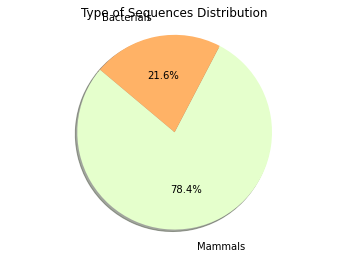

Text(0, 0.5, 'Count')

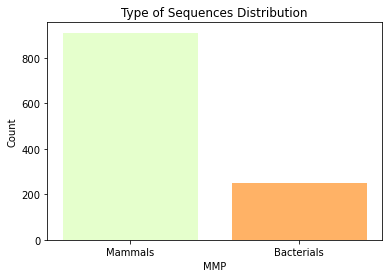

In [26]:
pie_chart(pie,'Organism' , 'Count', 'Type of Sequences Distribution')
plt.bar(pie.Organism,pie.Count, color = ['#e5ffcc', '#ffb266'])
plt.title("Type of Sequences Distribution")
plt.xlabel("MMP")
plt.ylabel('Count')

### Feature set


X são as variáveis independentes. Cada aminoácido é uma variável independente.

In [27]:
X = df.drop(classCol, axis=1).drop(0, axis=1).values
X[0:5]


array([[2866457.348,       0.   ,       0.   , ...,       0.   ,
              0.   ,       0.   ],
       [ 502018.374,       0.   ,       0.   , ...,       0.   ,
              0.   ,       0.   ],
       [1648684.363,       0.   ,       0.   , ...,       0.   ,
              0.   ,       0.   ],
       [ 783553.293,       0.   ,       0.   , ...,       0.   ,
              0.   ,       0.   ],
       [1072070.545,       0.   ,       0.   , ...,       0.   ,
              0.   ,       0.   ]])

Y é a variável dependente.

In [28]:
y = df[classCol].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:


In [29]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
normalize=True
X[0:5]

array([[ 1.84228716, -0.02937367, -0.02937367, ..., -0.02937367,
        -0.02937367, -0.02937367],
       [-1.30965858, -0.02937367, -0.02937367, ..., -0.02937367,
        -0.02937367, -0.02937367],
       [ 0.21891925, -0.02937367, -0.02937367, ..., -0.02937367,
        -0.02937367, -0.02937367],
       [-0.93435484, -0.02937367, -0.02937367, ..., -0.02937367,
        -0.02937367, -0.02937367],
       [-0.54974321, -0.02937367, -0.02937367, ..., -0.02937367,
        -0.02937367, -0.02937367]])

### Train Test Split

Escolhendo 20% (test_size=0.2) para teste e 80% para treinamento.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (928, 4103) (928,)
Test set: (232, 4103) (232,)


<div id="classification">
    <h2>Classification</h2>
</div>


<h3>K nearest neighbor (KNN)</h3>


#### Import library


Classifier implementing the k-nearest neighbors vote.


In [31]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Lets start the algorithm with k=4 for now:


In [32]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting

we can use the model to predict the test set:


In [33]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 0, 1, 0, 0])

### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [34]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9892241379310345
Test set Accuracy:  0.9913793103448276


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.


In [41]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#mean_acc
mean_acc = [0.95689655, 0.9485460, 0.93934483, 0.93824483, 0.937334483,
       0.936303448, 0.937438483, 0.93443448, 0.9332848]
mean_acc

[0.95689655,
 0.948546,
 0.93934483,
 0.93824483,
 0.937334483,
 0.936303448,
 0.937438483,
 0.93443448,
 0.9332848]

#### Plot  model accuracy  for Different number of Neighbors


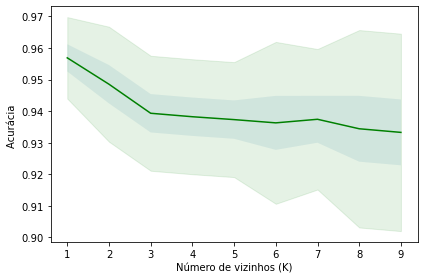

In [45]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
#plt.legend(('Acurácia ', '+/- 1xstd','+/- 3xstd'), loc='lower right')
plt.ylabel('Acurácia ')
plt.xlabel('Número de vizinhos (K)')
plt.tight_layout()
#plt.show()
plt.savefig("/tmp/accuracy-no-legend.png",dpi=1200)

In [37]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9956896551724138 with k= 1


Matriz Confusa: 
[[181   0]
 [ 12  39]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       181
           1       1.00      0.76      0.87        51

    accuracy                           0.95       232
   macro avg       0.97      0.88      0.92       232
weighted avg       0.95      0.95      0.95       232

Acurácia do modelo:  0.9482758620689655
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       181
           1       1.00      0.76      0.87        51

    accuracy                           0.95       232
   macro avg       0.97      0.88      0.92       232
weighted avg       0.95      0.95      0.95       232

Confusion matrix, without normalization
[[181   0]
 [ 12  39]]


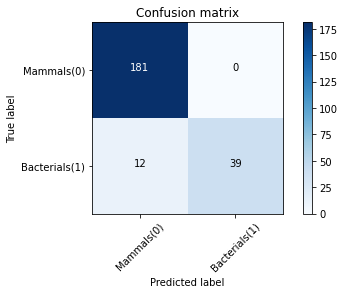

In [19]:
# Treinando o modelo KNN com o melhor parâmetro para K

from sklearn.neighbors import KNeighborsClassifier  
#classifier = KNeighborsClassifier(n_neighbors= mean_acc.argmax()+1)
classifier = KNeighborsClassifier(n_neighbors = 27)
classifier.fit(X_train, y_train)  

# Aplicando os valores de teste novamente
y_pred = classifier.predict(X_test) 

# Importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  


# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))


from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("/tmp/confusion.png", dpi=300)
    plt.show()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Mammals(0)','Bacterials(1)'],normalize=False,  title='Confusion matrix')



In [20]:
# Salvando o modelo
import joblib
joblib.dump(classifier, "classifier.dump")

# Recuperando
classifier = joblib.load('classifier.dump')

### Rodando em dados reais

In [43]:
real = pd.read_csv("real.csv", header=None)
real.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,real,32,23,41,10,34,11,26,8,27,...,23,16,19,17,41,28,0,0,0,11931766
1,real,61,55,81,18,71,19,43,29,45,...,44,30,45,44,69,55,0,0,0,11624741
2,real,88,79,122,26,104,29,66,46,69,...,68,42,64,73,107,79,0,0,0,11475399
3,real,118,102,158,36,138,39,84,64,93,...,90,58,87,102,141,108,0,0,0,11555542
4,real,151,124,200,46,171,50,110,72,119,...,111,76,106,117,185,136,0,0,0,11920324


In [44]:
X_real = real.drop(0, axis=1).values
X_real[0:5]

array([[      32,       23,       41,       10,       34,       11,
              26,        8,       27,       31,       34,       23,
              22,        3,       23,       16,       19,       17,
              41,       28,        0,        0,        0, 11931766],
       [      61,       55,       81,       18,       71,       19,
              43,       29,       45,       63,       67,       41,
              43,        8,       44,       30,       45,       44,
              69,       55,        0,        0,        0, 11624741],
       [      88,       79,      122,       26,      104,       29,
              66,       46,       69,       89,       91,       71,
              67,       11,       68,       42,       64,       73,
             107,       79,        0,        0,        0, 11475399],
       [     118,      102,      158,       36,      138,       39,
              84,       64,       93,      114,      121,      101,
              84,       14,       90,       5

In [45]:
## Normalizando os dados
X_real = preprocessing.StandardScaler().fit(X_real).transform(X_real.astype(float))
X[0:5]

array([[ 1.84,  0.11,  1.57, ..., -0.03, -0.03, -0.03],
       [-1.31,  0.11, -0.17, ..., -0.03, -0.03, -0.03],
       [ 0.22,  0.11, -1.23, ..., -0.03, -0.03, -0.03],
       [-0.94,  0.11, -1.88, ..., -0.03, -0.03, -0.03],
       [-0.55,  0.11, -1.23, ..., -0.03, -0.03, -0.03]])

In [46]:
# Aplicando os valores de teste novamente
y_pred_real = classifier.predict(X_real) 
y_pred_real

ValueError: query data dimension must match training data dimension

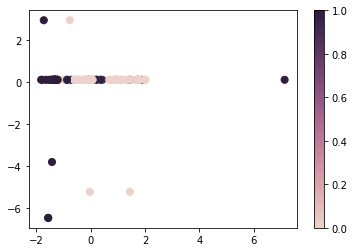

In [47]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.show()